# 🧠 Salary Prediction Using Linear Regression

This beginner-level machine learning project aims to predict an employee’s **salary** based on their **years of experience** using **Simple Linear Regression**. The goal is to build an interpretable model, visualize the relationship between experience and salary, and make predictions for new data points.

## Context

Imagine you are working with an HR analytics team at a hiring consultancy firm. The firm has collected historical data of employees including their years of experience and the corresponding salaries. The management wants to use this data to predict the expected salary for a new candidate based on their work experience. This would help in making fair salary offers and in budgeting for hiring plans.

<hr>

## Dataset Details

- **Features:** exp(in months) (numeric)
- **Target:** salary(in thousands dollars) (numeric)
- **Size:** 1000 entries

The dataset contains only one independent variable (`exp(in months)`), making it a perfect candidate for a **simple linear regression model**.
<hr>

## Importing necessary modules

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

## Data Loading and Exploring

In [16]:
data = pd.read_csv("Experience-Salary.csv")
print(data.head())

   exp(in months)  salary(in thousands)
0       18.290293             16.521825
1       17.023407             11.666234
2       26.343613             23.167255
3       19.105834             20.877145
4       27.742516             23.166236


This data looks messy with those decimal values, let's round off them

In [22]:
data["exp(in months)"] = data["exp(in months)"].round(0).astype(int)
data["salary(in thousands)"] = data["salary(in thousands)"].round(1)
print(data.head())

   exp(in months)  salary(in thousands)
0              18                  16.5
1              17                  11.7
2              26                  23.2
3              19                  20.9
4              28                  23.2


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   exp(in months)        1000 non-null   int64  
 1   salary(in thousands)  1000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 15.8 KB


- The datatype is correct.
- No null values found

In [25]:
data.describe()

,exp(in months),salary(in thousands)
count,1000.000000,1000.000000
mean,26.151000,26.721700
std,8.727678,8.845393
min,1.000000,-1.300000
25%,20.000000,20.500000
50%,26.000000,26.750000
75%,32.000000,32.600000
max,49.000000,55.300000


**Min value of `salary(in thousands)`:** -1.3k → this is not realistic for salary (salary shouldn’t be negative!)

let's check how many of these are their

In [32]:
data[data["salary(in thousands)"] < 0]

,exp(in months),salary(in thousands)
133,9,-1.3
772,3,-0.1


Let's impute them with 0

In [33]:
data.loc[data["salary(in thousands)"] < 0, "salary(in thousands)"] = 0

In [34]:
data.describe()

,exp(in months),salary(in thousands)
count,1000.000000,1000.000000
mean,26.151000,26.723100
std,8.727678,8.841062
min,1.000000,0.000000
25%,20.000000,20.500000
50%,26.000000,26.750000
75%,32.000000,32.600000
max,49.000000,55.300000


## Visulaise the data

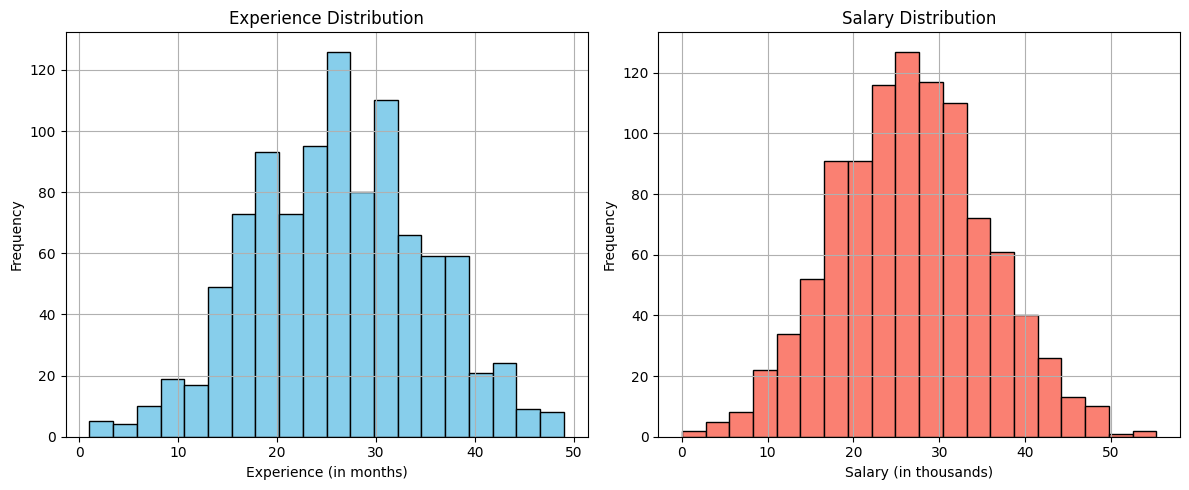

In [41]:
plt.figure(figsize=(12, 5))

# Left subplot: Experience distribution
plt.subplot(1, 2, 1)
data["exp(in months)"].hist(bins=20, color="skyblue", edgecolor="black")
plt.title("Experience Distribution")
plt.xlabel("Experience (in months)")
plt.ylabel("Frequency")

# Right subplot: Salary distribution
plt.subplot(1, 2, 2)
data["salary(in thousands)"].hist(bins=20, color="salmon", edgecolor="black")
plt.title("Salary Distribution")
plt.xlabel("Salary (in thousands)")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

Both the columns have normal destribution

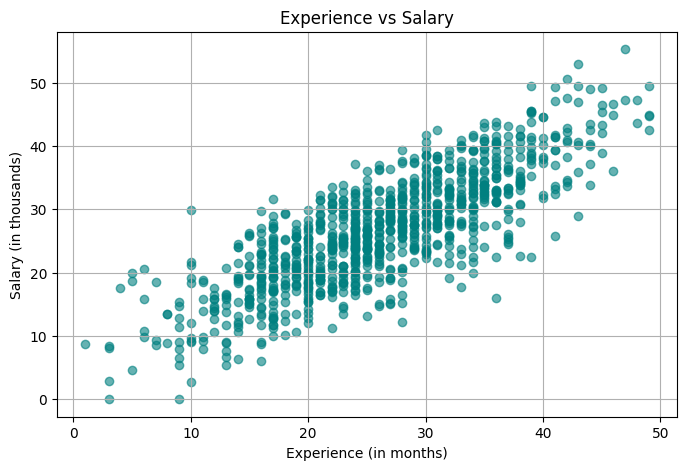

In [38]:
plt.figure(figsize=(8, 5))
plt.scatter(data["exp(in months)"], data["salary(in thousands)"], color="teal", alpha=0.6)
plt.title("Experience vs Salary")
plt.xlabel("Experience (in months)")
plt.ylabel("Salary (in thousands)")
plt.grid(True)
plt.show()

Clearly we can see the linear trend. That’s great for Linear Regression.

## Train Linear Regression model

### Split data into train & test

In [42]:
# Features (X) and Target (y)
X = data[["exp(in months)"]]
y = data["salary(in thousands)"]

# Split into 90% training and 10% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# checking sizes
print(f"Train size: {X_train.shape[0]} samples")
print(f"Test size: {X_test.shape[0]} samples")

Train size: 900 samples
Test size: 100 samples


### Train Linear regression on train data

In [43]:
# Create the model
model = LinearRegression()

# Fit the model on training data
model.fit(X_train, y_train)

LinearRegression()

### Predicting on test data

In [44]:
# Predict salaries using the test set
y_pred = model.predict(X_test)

In [46]:
results = pd.DataFrame({
    "Experience (months)": X_test["exp(in months)"].values,
    "Actual Salary (k)": y_test.values,
    "Predicted Salary (k)": y_pred.round(1)
})

print(results.head(10))

   Experience (months)  Actual Salary (k)  Predicted Salary (k)
0                   37               25.3                  35.8
1                   18               22.4                  20.0
2                   45               43.4                  42.4
3                   34               30.2                  33.3
4                   16               22.0                  18.3
5                   24               18.0                  25.0
6                   25               24.2                  25.8
7                   24               27.1                  25.0
8                   49               42.6                  45.8
9                   24               27.8                  25.0


### Visualise the regression line on Salary vs Experience

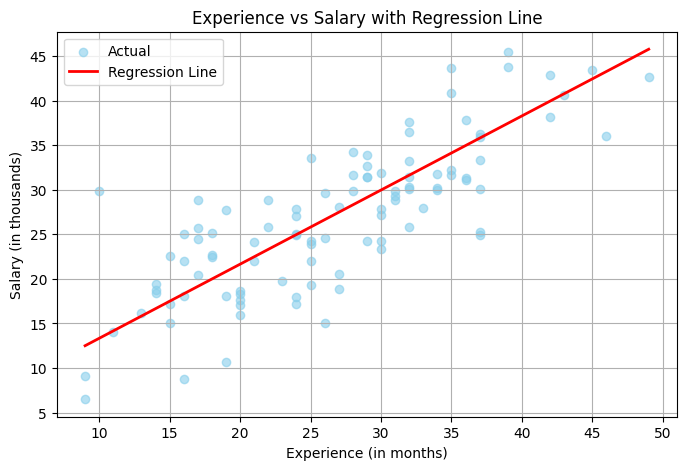

In [53]:
plt.figure(figsize=(8, 5))

# Plot actual data points
plt.scatter(X_test, y_test, color='skyblue', label='Actual', alpha=0.6)

# Plot the regression line
# Sort values for a clean line
X_sorted = np.sort(X_test.values.reshape(-1, 1), axis=0)
y_pred_line = model.predict(X_sorted)
plt.plot(X_sorted, y_pred_line, color='red', linewidth=2, label='Regression Line')

plt.title("Experience vs Salary with Regression Line")
plt.xlabel("Experience (in months)")
plt.ylabel("Salary (in thousands)")
plt.legend()
plt.grid(True)
plt.show()

## Evaluate the model

In [51]:
# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# R² Score
r2 = r2_score(y_test, y_pred)

# Print all
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

Mean Absolute Error (MAE): 4.00
Mean Squared Error (MSE): 25.30
Root Mean Squared Error (RMSE): 5.03
R² Score: 0.6264


- **MAE (4.00)**
On average, model’s salary predictions are off by about **4,000** (since salary is in thousands).

- **MSE (25.30)** and **RMSE (5.03)**
RMSE gives more weight to larger errors — so about **5,000** deviation on average.

- **R² Score (0.6264)**
Model explains **62.6%** of the variation in salaries using just **experience in months**.

## Conclusion

In this project, we worked with a simulated dataset resembling historical employee records, where the goal was to predict salaries based on years of experience. Imagine this scenario within an HR analytics team at a hiring consultancy firm — the firm needs a simple and effective tool to estimate salary expectations for new candidates using existing employee data.

We built a linear regression model that learned the relationship between experience (in months) and salary (in thousands). After training and evaluating the model on 1,000 records, we achieved an **R² score of 0.6264**, indicating the model could explain over **62%** of the variation in salary using just one feature. With an **average prediction error of about 4,000**, the model provides a solid baseline for salary estimation.

This project demonstrates how even a simple regression model can be used by HR teams to support fair and data-driven salary offers, improve budgeting accuracy, and streamline hiring processes.

# Author: Rohan Das

**Junior Engineer at CloudxLab | Alumni of Vivekananda Global University**

*Jaipur, Rajasthan, India*  
📧 Email: [rd555217@gmail.com](mailto:rd555217@gmail.com)  
💻 GitHub: [ROHANDAS2003](https://github.com/ROHANDAS2003)  
🌐 Portfolio: [rohandas2003.com](https://www.rohandas2003.com/)<br>
🌳 Linktree: [mr_RohanDas](https://linktr.ee/mr_RohanDas)

<img src="https://ugc.production.linktr.ee/f9907aa7-25b0-4295-87cb-e88460e512ce_myimage1.png?io=true&size=avatar-v3_0" width="200" height="200" alt="Rohan Das">

---

## About Me

Hello! I'm Rohan Das, a passionate AI & ML enthusiast, Python developer, and full-stack web developer. With a strong foundation in computer applications and hands-on experience in various technologies, I am committed to continuous learning and innovation.

---

## Skills

- **Programming Languages:** ML Basic, Python, SQL, Full-stack web development  
- **Frameworks & Libraries:** Django, Numpy, Pandas, Matplotlib  
- **Tools & Platforms:** Linux, Git, GitHub  

---

## Let's Connect

I'm always open to new opportunities and collaborations. Feel free to reach out to me via email or connect with me on LinkedIn.

[![LinkedIn](https://img.shields.io/badge/LinkedIn-RohanDas-blue)](https://www.linkedin.com/in/mr-rohandas/)

---

*Last updated: April 5, 2025*
